In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

### Relu MLP Animation

In [3]:
scale = .8
bias = 1

# generate random weights and biases of 3 by 3 from the normal distribution
W1 = scale* np.random.randn(3, 3)
W2 = scale* np.random.randn(3, 3)
W3 = scale* np.random.randn(3, 3)
W4 = scale* np.random.randn(3, 3)
b1 = scale* np.random.randn(3)[: , np.newaxis] + bias
b2 = scale* np.random.randn(3)[: , np.newaxis] + bias
b3 = scale* np.random.randn(3)[: , np.newaxis] + bias
b4 = scale* np.random.randn(3)[: , np.newaxis] + bias
# generate data for 100 points
x = np.random.randn(3, 100)

In [4]:
def relu(x):
    return np.maximum(0,x)

def interpolate(x1,x2,steps):
    t = np.linspace(0,1,steps)
    frames = []
    for i in range(steps):
        frames.append(x1 + t[i]*(x2-x1))
    return frames

# make a bunch of data in 3d space
x1 = W1 @ x + b1
x1_relu = relu(x1)
x2 = W2 @ x1_relu + b2
x2_relu = relu(x2)
x3 = W3 @ x2_relu + b3
x3_relu = relu(x3)
x4 = W4 @ x3_relu + b4
x4_relu = relu(x4)

transform_steps = 50
relu_steps = 20
wait_steps = 20
t1 = interpolate(x,x1,transform_steps)
relu_t1 = interpolate(x1,x1_relu,relu_steps)
t2 = interpolate(x1_relu,x2,transform_steps)
relu_t2 = interpolate(x2,x2_relu,relu_steps)
t3 = interpolate(x2_relu,x3,transform_steps)
relu_t3 = interpolate(x3,x3_relu,relu_steps)
t4 = interpolate(x3_relu,x4,transform_steps)
relu_t4 = interpolate(x4,x4_relu,relu_steps)

# join the frames together
frames = t1 + [x1]*wait_steps + relu_t1 + [x1_relu]*wait_steps + t2 + [x2]*wait_steps + relu_t2 + [x2_relu]*wait_steps + t3 + [x3]*wait_steps + relu_t3 + [x3_relu]*wait_steps + t4 + [x4]*wait_steps + relu_t4 + [x4_relu]*wait_steps
print("Total frames: ",len(frames))

Total frames:  440


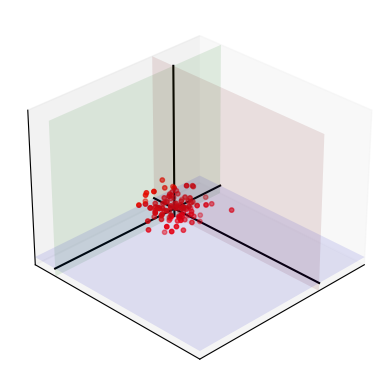

MovieWriter imagemagick unavailable; using Pillow instead.


In [8]:
# Calculate global min and max for each axis (x, y, z)
global_x_min = min(np.min(frame[0]) for frame in frames)/4
global_x_max = max(np.max(frame[0]) for frame in frames)
global_y_min = min(np.min(frame[1]) for frame in frames)/4
global_y_max = max(np.max(frame[1]) for frame in frames)
global_z_min = min(np.min(frame[2]) for frame in frames)/4
global_z_max = max(np.max(frame[2]) for frame in frames)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter([],[],[],c='r',s=10)

# Set the axis limits to the global min and max values
ax.set_xlim(global_x_min, global_x_max)
ax.set_ylim(global_y_min, global_y_max)
ax.set_zlim(global_z_min, global_z_max)

# don't show the axes labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.view_init(elev=30, azim=45)

ax.plot([global_x_min, global_x_max], [0, 0], [0, 0], color='k')  # X-axis
ax.plot([0, 0], [global_y_min, global_y_max], [0, 0], color='k')  # Y-axis
ax.plot([0, 0], [0, 0], [global_z_min, global_z_max], color='k')  # Z-axis


# Add translucent hyperplanes to separate the quadrants
xx, yy = np.meshgrid([global_x_min, global_x_max], [global_y_min, global_y_max])

# XY plane (Z=0)
ax.plot_surface(xx, yy, np.zeros_like(xx), color='blue', alpha=0.1, rstride=100, cstride=100)

# XZ plane (Y=0)
xx, zz = np.meshgrid([global_x_min, global_x_max], [global_z_min, global_z_max])
ax.plot_surface(xx, np.zeros_like(xx), zz, color='green', alpha=0.1, rstride=100, cstride=100)

# YZ plane (X=0)
yy, zz = np.meshgrid([global_y_min, global_y_max], [global_z_min, global_z_max])
ax.plot_surface(np.zeros_like(yy), yy, zz, color='red', alpha=0.1, rstride=100, cstride=100)


# Function to update the scatter plot for each frame
def update(frame):
    # Update the scatter plot data
    scat._offsets3d = (frame[0], frame[1], frame[2])
    return scat,

# Create animation
ani = FuncAnimation(fig, update, frames=frames, blit=True)

# Show the plot
plt.show()

# Save the animation to a file
ani.save('../images/animation.gif', writer='imagemagick', fps=30)
